# San Joaquin Valley Township-Range Well Completion Reports Datasets

Related links:
* For the documentation about this dataset, its source, how to download, and the features of interest, please refer to our [Well Completion Reports Dataset](/doc/assets/well_completion_reports.md) documentation.
* For the explanations on how the sortage mapping datasets are mapped to TownshipRange please refer to our [Public Land Survey System](../assets/plss_sanjoaquin_riverbasin.md) documentation.

In [1]:
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import altair as alt
from lib.well_completion_reports_v2 import WellCompletionReportsDataset
from lib.viz_altair import draw_missing_data_chart, draw_base_map, view_attribute_per_year
from lib.viz_matplotlib import plot_townships_feature_per_year
from lib.geodataframe_visualization_class import NormalizedDataSliderVisualization

## ETL

In [3]:
wcr = WellCompletionReportsDataset()

Pre-process the well completion report data, geospatial location and additional elevation, combine them into the the geospatial map_df dataset and overlay the San Joaquin Valley boundaries to keep only the data in the San Joaquin Valley

In [4]:
wcr.preprocess_map_df(features_to_keep=["WCRNUMBER", "YEAR", "geometry"])
wcr.keep_only_sjv_data()
wcr.map_df

,WCRNUMBER,YEAR,geometry
0,WCR2016-015575,2016.0,POINT (-119.13278 35.07333)
1,WCR2016-002959,2016.0,POINT (-119.10915 35.07731)
2,WCR2015-002563,2015.0,POINT (-119.14529 35.08397)
3,WCR2017-008490,2017.0,POINT (-119.13750 35.09361)
4,WCR0266449,2014.0,POINT (-119.21614 35.08392)
...,...,...,...
14608,WCR2019-000470,2018.0,POINT (-120.97241 38.26662)
14609,WCR2014-004482,2014.0,POINT (-120.93000 38.28917)
14610,WCR2015-012786,2015.0,POINT (-120.35110 37.51419)
14611,WCR2020-005670,2020.0,POINT (-120.37339 37.51425)


Look at missing data in the dataset

In [5]:
draw_missing_data_chart(wcr.map_df)

alt.LayerChart(...)

Map of the wells completed in the year 2021 in the San Joaquin Valley

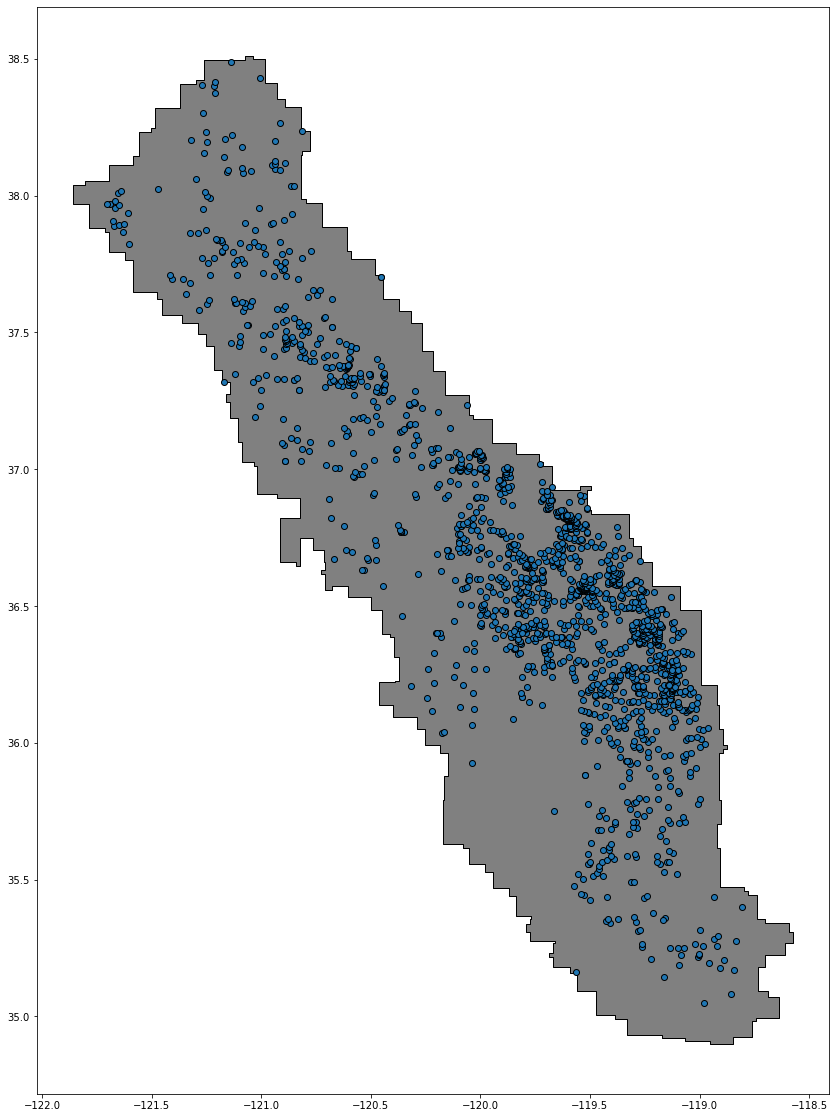

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
wcr.sjv_boundaries.plot(ax=ax, facecolor="grey", edgecolor='black', linewidth = 1, cmap=None, legend=None)
wcr.map_df[wcr.map_df["YEAR"]==2021].plot(ax=ax, edgecolor='black', linewidth = 1, cmap=None, legend=True)
plt.show()

For every year, we count the number of completed wells in every Township-Range

In [7]:
wcr.count_points_by_township(original_feature_name="WCRNUMBER", new_feature_name="WCR_COUNT")
wcr.fill_townships_with_no_data(feature_to_fill="WCR_COUNT", feature_value=0)
wcr.map_df

,TOWNSHIP_RANGE,YEAR,geometry,WCR_COUNT
0,T01N R02E,2016.0,"POLYGON ((-121.78743 37.88191, -121.78743 37.9...",1
1,T01N R03E,2016.0,"POLYGON ((-121.58654 37.96908, -121.58654 37.8...",6
2,T01N R04E,2016.0,"POLYGON ((-121.58708 37.88115, -121.58708 37.9...",1
3,T01N R06E,2016.0,"POLYGON ((-121.36722 37.97096, -121.25671 37.9...",3
4,T01N R07E,2016.0,"POLYGON ((-121.25785 37.97210, -121.14772 37.9...",3
...,...,...,...,...
470,T32S R23E,2020.0,"POLYGON ((-119.55883 35.09119, -119.55883 35.1...",0
471,T32S R24E,2020.0,"POLYGON ((-119.44762 35.09378, -119.44762 35.1...",0
472,T32S R25E,2020.0,"POLYGON ((-119.34122 35.09371, -119.34122 35.1...",0
474,T32S R27E,2020.0,"POLYGON ((-119.12837 35.09439, -119.12837 35.1...",0


In [8]:
wcr.prepare_output_from_map_df()
wcr.output_dataset_to_csv(output_filename="../assets/outputs/well_completion_reports.csv")

## EDA

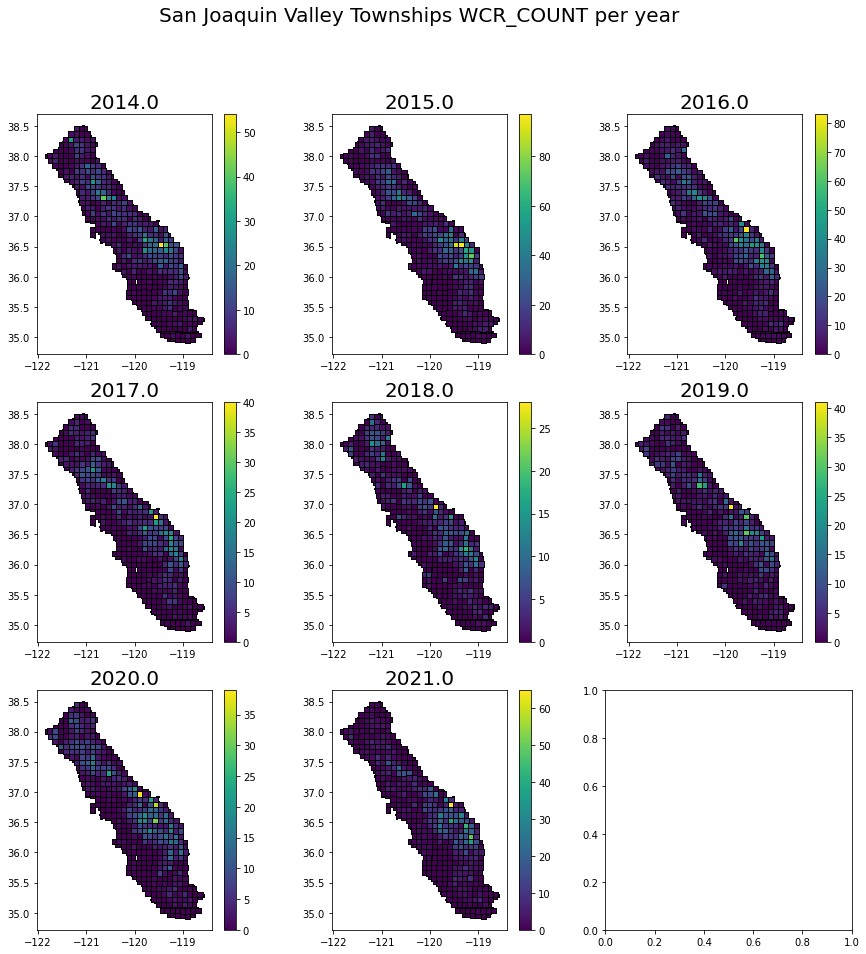

In [9]:
plot_townships_feature_per_year(wcr.map_df, feature_name="WCR_COUNT", cmap="viridis")